## ElasticNet Regression 
ElasticNet regularization applies both L1-norm and L2-norm regularization to penalize the coefficients in a regression model. I we'll learn how to use sklearn's ElasticNet and ElasticNetCV models to analyze regression data. The post covers:

    Preparing data
    Best alpha
    Defining model and checking the results
    Cross-validation with ElasticNetCV

In [1]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the data
df=pd.read_csv("C:/practice datasets/ManufactCosts.csv")
print(df.info())
x=df.iloc[:,2:]
y=df.iloc[:,1]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25 non-null     int64  
 1   cost            25 non-null     float64
 2   capitalcost     25 non-null     float64
 3   laborcost       25 non-null     float64
 4   energycost      25 non-null     float64
 5   materialscost   25 non-null     float64
 6   capitalprice    25 non-null     float64
 7   laborprice      25 non-null     float64
 8   energyprice     25 non-null     float64
 9   materialsprice  25 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.1 KB
None


In [3]:
# split the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

In [4]:
#To figure out what alpha value is good for our model, we'll define multiple values and check the performance accuracy.

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [5]:
#we'll check the R-squared, MSE, and RMSE metrics for each alpha.

for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.99, MSE:212.70, RMSE:14.58
Alpha:0.0010, R2:0.99, MSE:272.02, RMSE:16.49
Alpha:0.0100, R2:0.98, MSE:369.18, RMSE:19.21
Alpha:0.1000, R2:0.95, MSE:964.97, RMSE:31.06
Alpha:0.3000, R2:0.85, MSE:3048.36, RMSE:55.21
Alpha:0.5000, R2:0.75, MSE:5119.29, RMSE:71.55
Alpha:0.7000, R2:0.66, MSE:6863.19, RMSE:82.84
Alpha:1.0000, R2:0.56, MSE:8909.42, RMSE:94.39


The result shows that we can use 0.01 value for our model.


Defining model and checking the results

Now, we can define ElasticNet regression model with an alpha value taken above and fit it with xtrain and ytrain data. Then we'll predict xtest data and check the model accuracy.

In [6]:
elastic=ElasticNet(alpha=0.01).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.975, MSE:446.27, RMSE:21.13


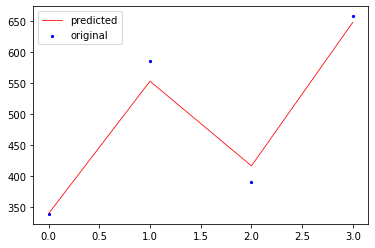

In [7]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()

Cross-validation with ElasticNetCV

ElasticNetCV is a cross-validation class that can search multiple alpha values and applies the best one. We'll define the model with alphas value and fit it with xtrain and ytrain data.


In [8]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)
print(model.intercept_)

0.01
-187.7321288274859


We can predict xtest data and check the accuracy metrics.

In [9]:
ypred = model.predict(xtest)
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.975, MSE:446.27, RMSE:21.13
